In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import scipy.sparse as sp
import itertools

import graphClustering_flat as graphClustering
import plotting as plotting
import betheHessian_clustering as betheHessian

import graphClustering_hierarchical as hcd

In [8]:
dataset_localisation = 'datasets/powergrid/'
edges    = np.genfromtxt( dataset_localisation + 'UCTE_edges.txt' )
location = np.genfromtxt( dataset_localisation + 'UCTE_nodes.txt' )
posx = location[:,1]
posy = location[:,2]
pos  = {}

edges = np.array(edges,dtype=np.int32)
G = nx.Graph() #empty graph
G.add_edges_from(edges) #add edges
n = nx.number_of_nodes( G )

# resetting label ids
G = nx.convert_node_labels_to_integers(G, label_attribute = 'old_label' )

# updating label names and applying positions as attribute
for i in G.nodes():
    pos[i] = np.array([posx[G.nodes[i]['old_label']-1], posy[G.nodes[i]['old_label']-1]])
    G.nodes[i]['pos'] = pos[i].reshape(-1)

adjacency = nx.to_numpy_array(G)
print(len(G), 'nodes ,', len(G.edges), 'edges')

2783 nodes , 3762 edges


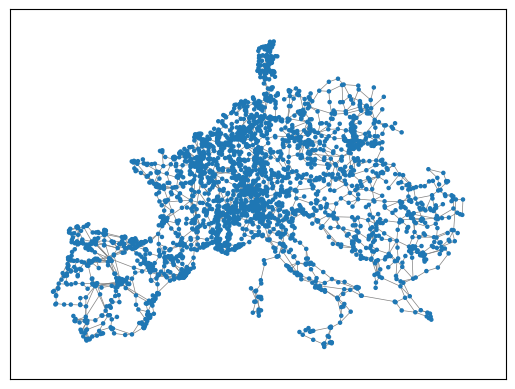

In [3]:
plotting.plot_graph( G, node_size = 5 )

In [4]:
def labels_from_partition( communities, n ):
    z = np.zeros( n, dtype = int )
    for k in range( len(comm_louvain ) ):
        for node in comm_louvain[ k ]:
            z[ node ] = k
    return z

Louvain finds 31 communities


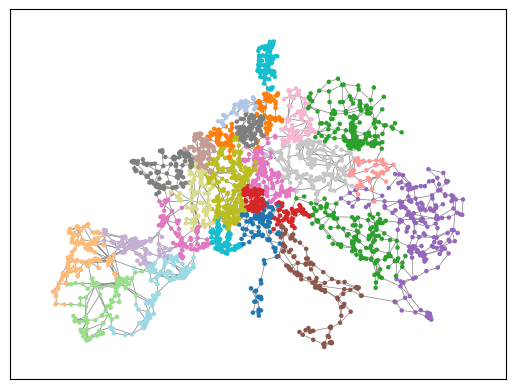

In [5]:
comm_louvain = nx.algorithms.community.louvain_communities( G )
z_louvain = labels_from_partition( comm_louvain, n )

print( 'Louvain finds', len( comm_louvain ), 'communities' )

plotting.plot_graph( G, communities = z_louvain, node_size=5 )

In [6]:
#comm_gn = nx.algorithms.community.girvan_newman( G )

In [7]:
depth = 2
z_gn = [ ]
for communities in itertools.islice( comm_gn, depth ):
    print( tuple(sorted(c) for c in communities) )
    z_at_given_depth = labels_from_partition( communities, n )
    z_gn.append( z_at_given_depth )

NameError: name 'comm_gn' is not defined

In [ ]:
for t in range( depth ):
    plotting.plot_graph( G, communities = z_gn[ t ], node_size = 5 )

In [ ]:
betheHessian = betheHessian.community_detection( nx.adjacency_matrix( G ) )

In [ ]:
z_bh = z_betheHessian.estimated_labels

In [ ]:
plotting.plot_graph( G, communities = z_bh, node_size = 5 )

In [9]:
T_td, z_td = hcd.recursiveBiParitioning( G )

/home/maximilien/Documents/EPFL/Simulations/graph-clustering/graphClustering_flat.py:19: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix( G )


Running


<class 'networkx.utils.decorators.argmap'> compilation 12:4: FutureWarning: normalized_laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
/home/maximilien/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/maximilien/Documents/EPFL/Simulations/graph-clustering/graphClustering_flat.py:19: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix( G )
<class 'networkx.utils.decorators.argmap'> compilation 12:4: FutureWarning: normalized_laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
/home/maximilien/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

Running
Running
Running


<class 'networkx.utils.decorators.argmap'> compilation 12:4: FutureWarning: normalized_laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
/home/maximilien/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/maximilien/Documents/EPFL/Simulations/graph-clustering/graphClustering_flat.py:19: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix( G )
<class 'networkx.utils.decorators.argmap'> compilation 12:4: FutureWarning: normalized_laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
/home/maximilien/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

Running
Running


<class 'networkx.utils.decorators.argmap'> compilation 12:4: FutureWarning: normalized_laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
/home/maximilien/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/maximilien/Documents/EPFL/Simulations/graph-clustering/graphClustering_flat.py:19: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix( G )
<class 'networkx.utils.decorators.argmap'> compilation 12:4: FutureWarning: normalized_laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
/home/maximilien/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

Running
Running


<class 'networkx.utils.decorators.argmap'> compilation 12:4: FutureWarning: normalized_laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
/home/maximilien/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/maximilien/Documents/EPFL/Simulations/graph-clustering/graphClustering_flat.py:19: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix( G )
<class 'networkx.utils.decorators.argmap'> compilation 12:4: FutureWarning: normalized_laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
/home/maximilien/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

Running


<class 'networkx.utils.decorators.argmap'> compilation 12:4: FutureWarning: normalized_laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
/home/maximilien/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/maximilien/Documents/EPFL/Simulations/graph-clustering/graphClustering_flat.py:19: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix( G )


Running


<class 'networkx.utils.decorators.argmap'> compilation 12:4: FutureWarning: normalized_laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
/home/maximilien/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/maximilien/Documents/EPFL/Simulations/graph-clustering/graphClustering_flat.py:19: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix( G )


Running


<class 'networkx.utils.decorators.argmap'> compilation 12:4: FutureWarning: normalized_laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
/home/maximilien/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/maximilien/Documents/EPFL/Simulations/graph-clustering/graphClustering_flat.py:19: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix( G )


Running


<class 'networkx.utils.decorators.argmap'> compilation 12:4: FutureWarning: normalized_laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
/home/maximilien/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/maximilien/Documents/EPFL/Simulations/graph-clustering/graphClustering_flat.py:19: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix( G )
/home/maximilien/Documents/EPFL/Simulations/graph-clustering/graphClustering_flat.py:25: RuntimeWarning: invalid value encountered in double_scalars
  r = np.sum( degrees**2 ) / np.sum( degrees ) - 1


ValueError: array must not contain infs or NaNs